In [1]:
import pandas as pd
df = pd.read_csv('1030_df.csv')
#import the dataset
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
len(df)

192036

In [3]:
missing_values = df.isnull().sum()

print(missing_values)

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


## some cleaning before EDA

In [4]:
from math import radians, sin, cos, sqrt, atan2

# Haversine formula to calculate the distance between two points on the Earth
def haversine(lon1, lat1, lon2, lat2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    # Compute differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    # Haversine formula
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Distance in kilometers
    distance = R * c
    return distance
# Apply the Haversine formula to each row and create a new column for the distance
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                   row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month_name()
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,May,Thursday,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,July,Friday,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,August,Monday,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,June,Friday,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,August,Thursday,28,17


## EDA

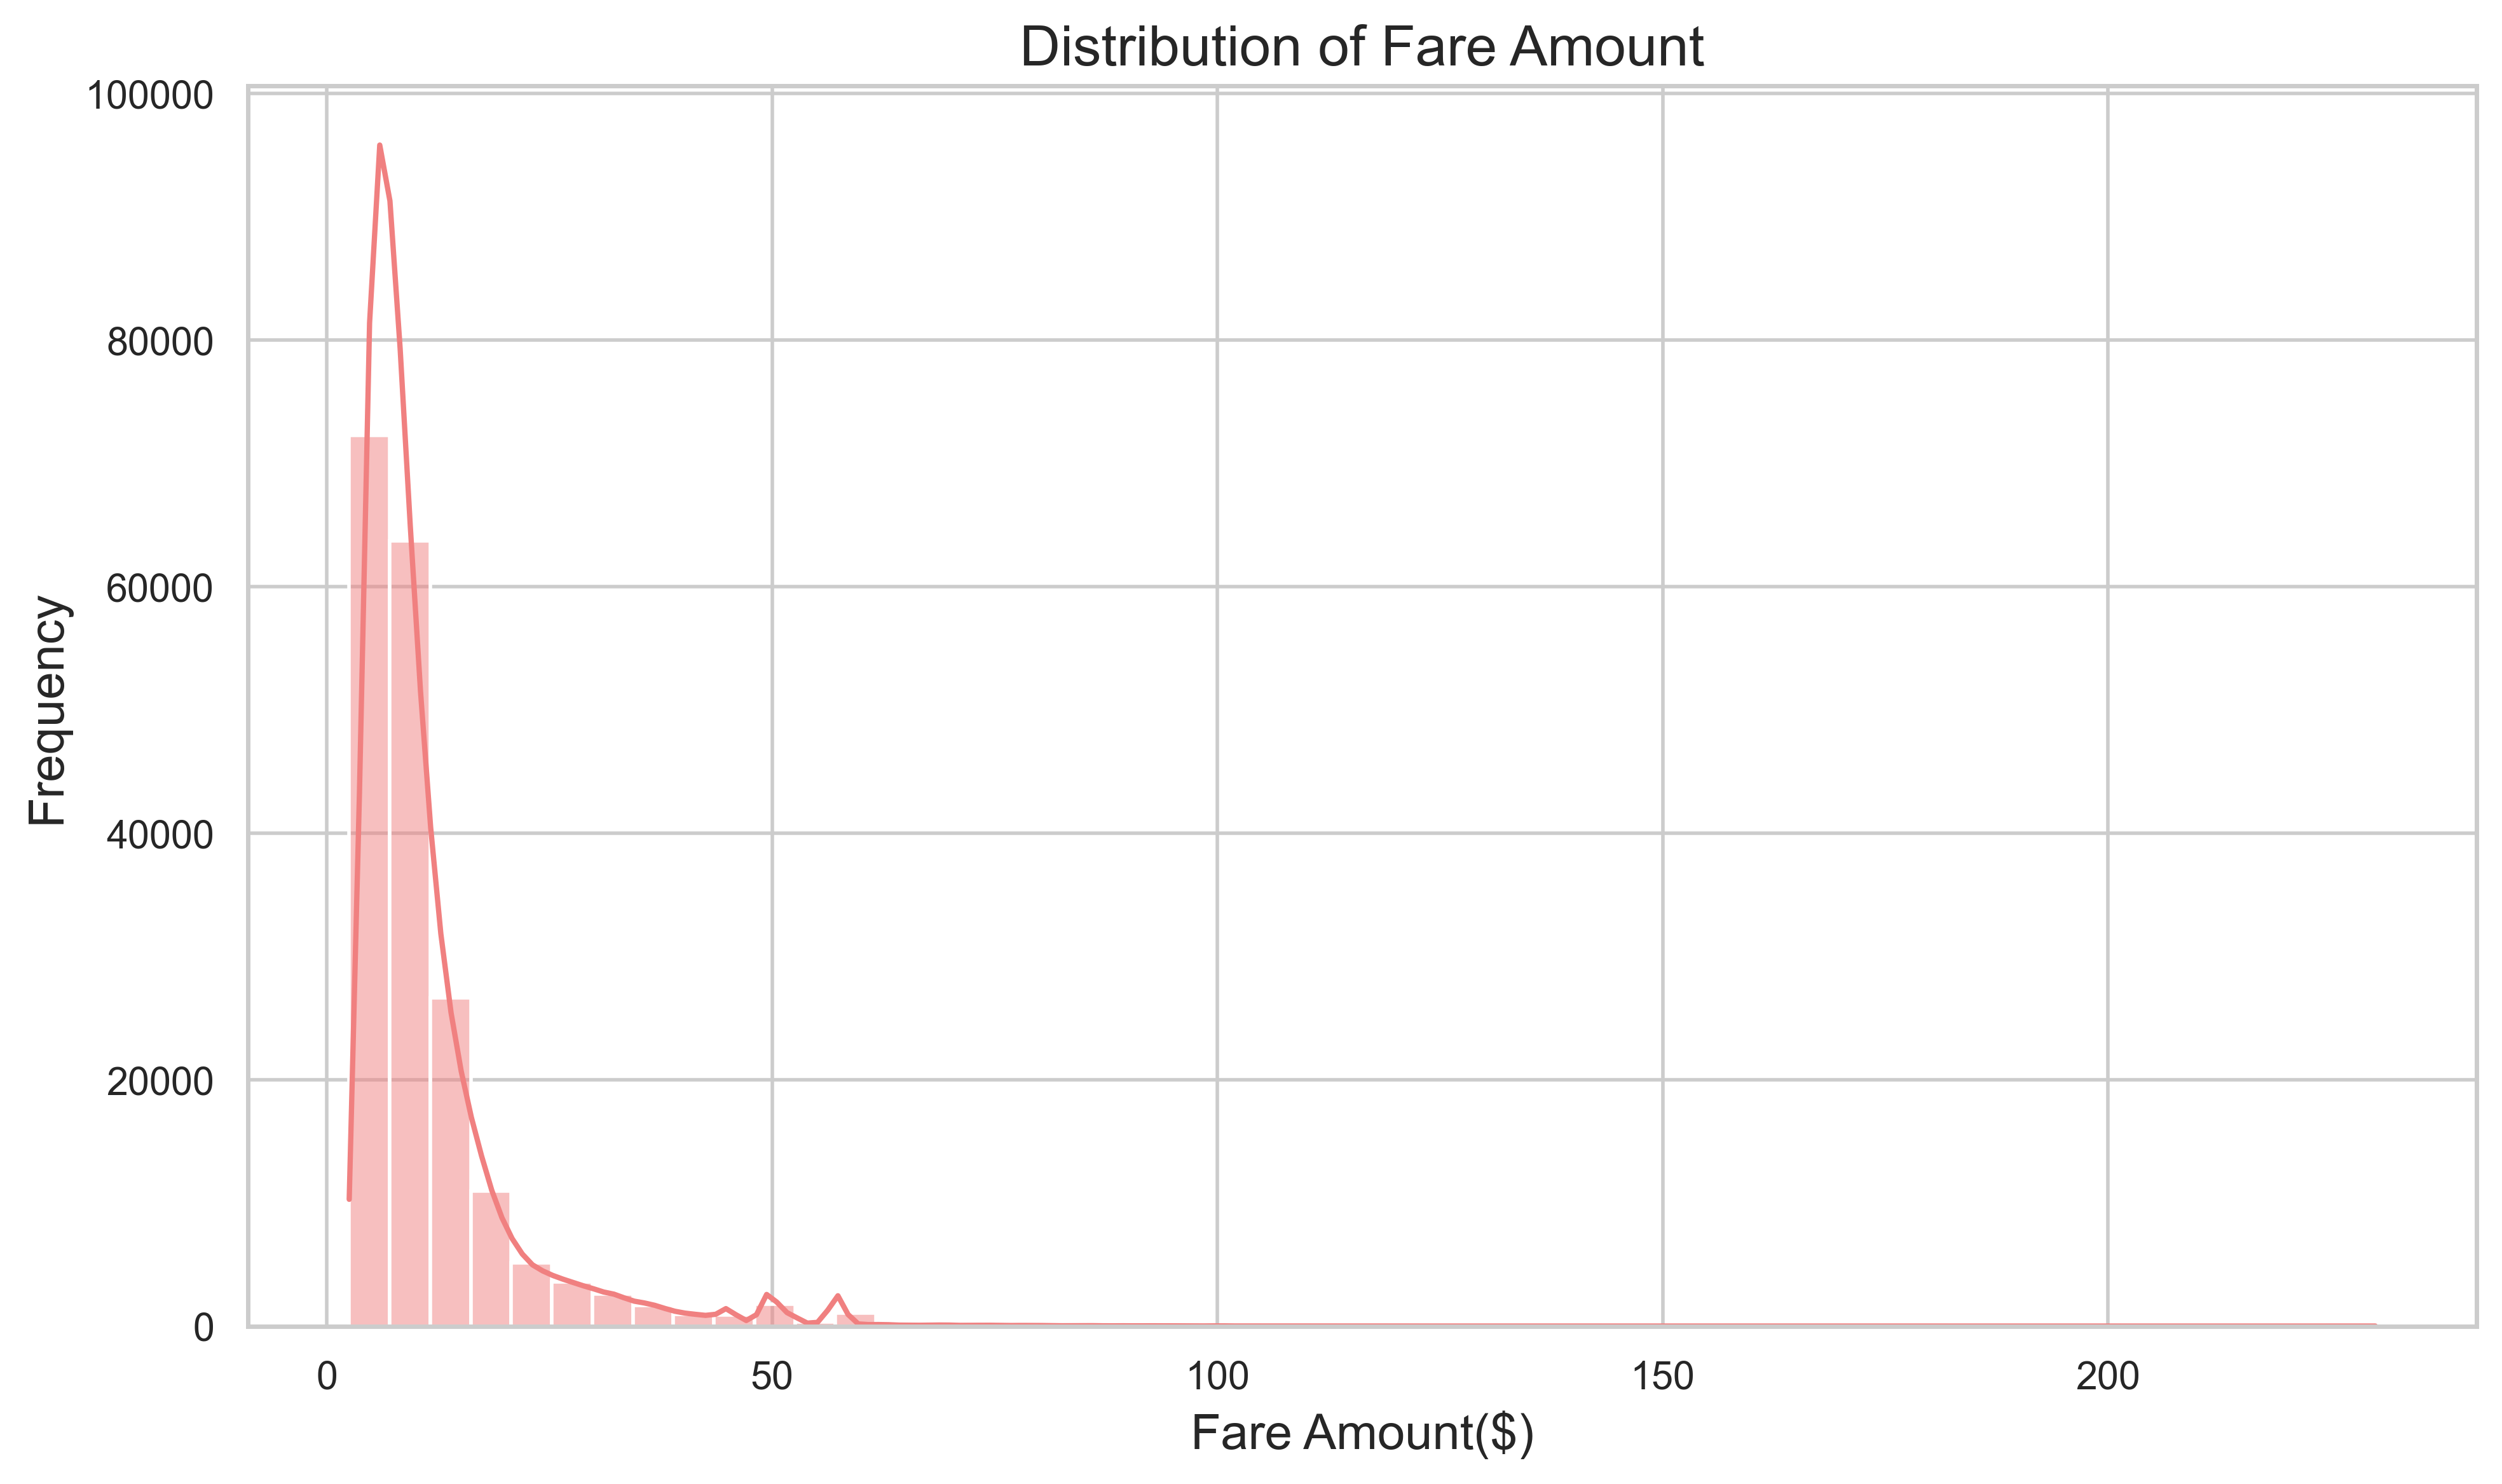

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6), dpi=400)  
sns.histplot(df['fare_amount'], bins=50, kde=True, color='lightcoral')  

plt.title('Distribution of Fare Amount', fontsize=16)
plt.xlabel('Fare Amount($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


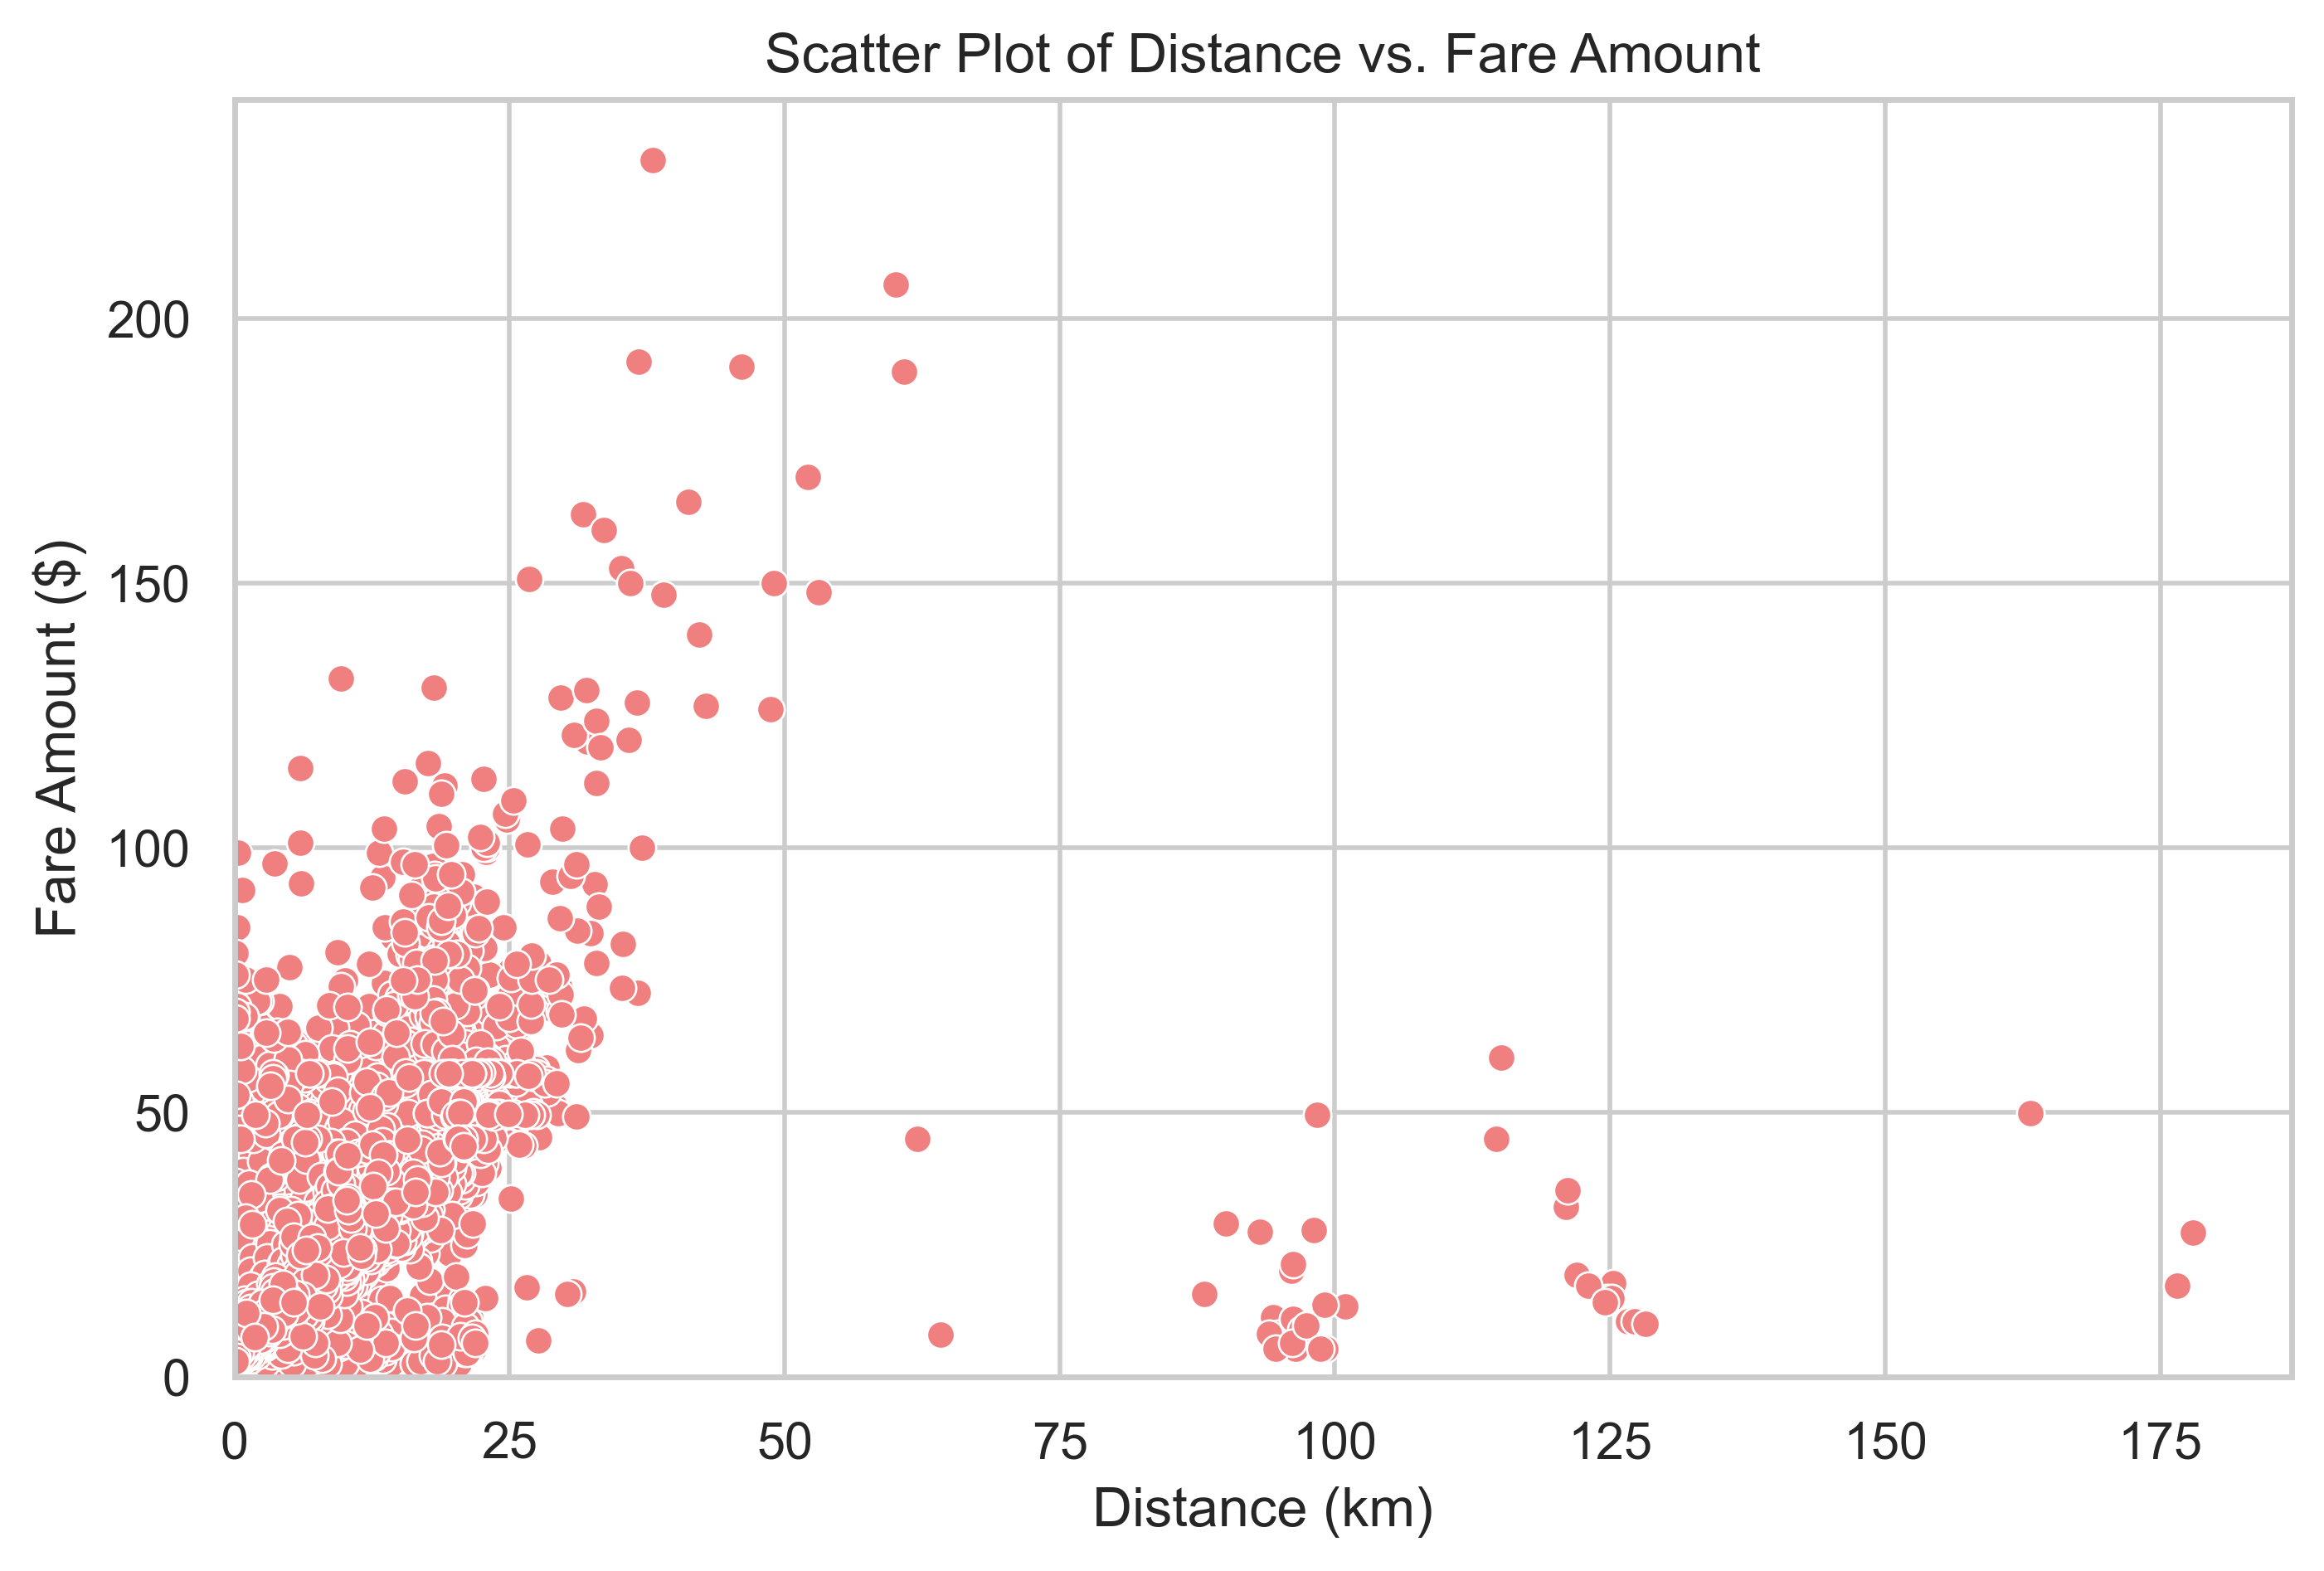

In [11]:
plt.figure(figsize=(8, 5), dpi=400)

sns.scatterplot(x=df['distance_km'], y=df['fare_amount'], color='lightcoral')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')

plt.title('Scatter Plot of Distance vs. Fare Amount')

plt.show() 

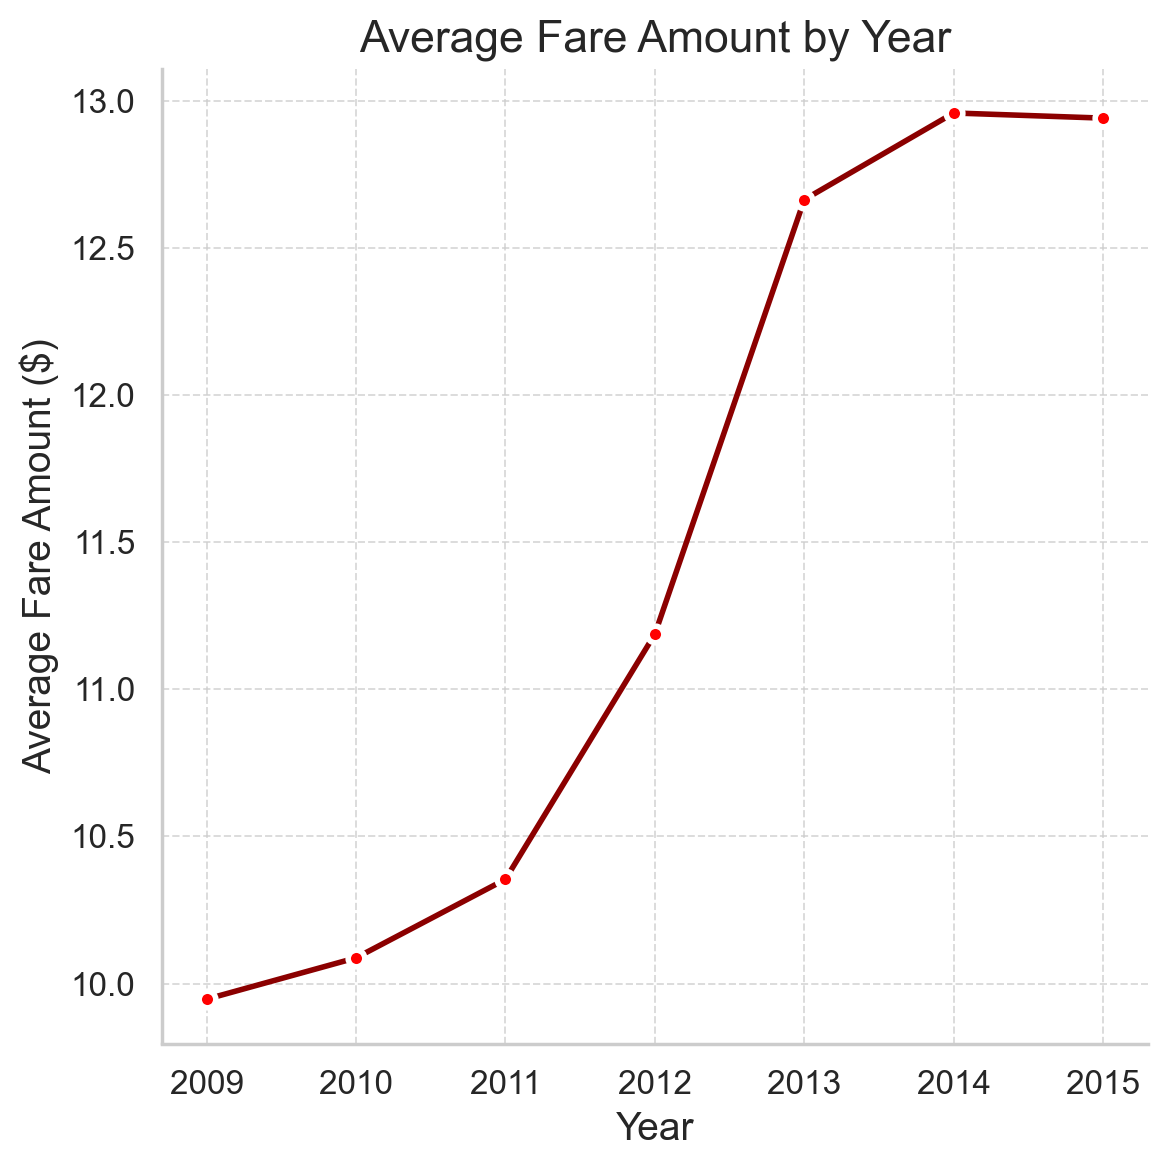

In [12]:
yearly_avg_fare = df.groupby('pickup_year')['fare_amount'].mean().reset_index()

sns.set(style="whitegrid", palette="Reds")

plt.figure(figsize=(6, 6), dpi=200)

sns.lineplot(x='pickup_year', y='fare_amount', data=yearly_avg_fare, marker='o', color='darkred', linewidth=2, markerfacecolor='red', markeredgewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Fare Amount ($)', fontsize=14)
plt.title('Average Fare Amount by Year', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()


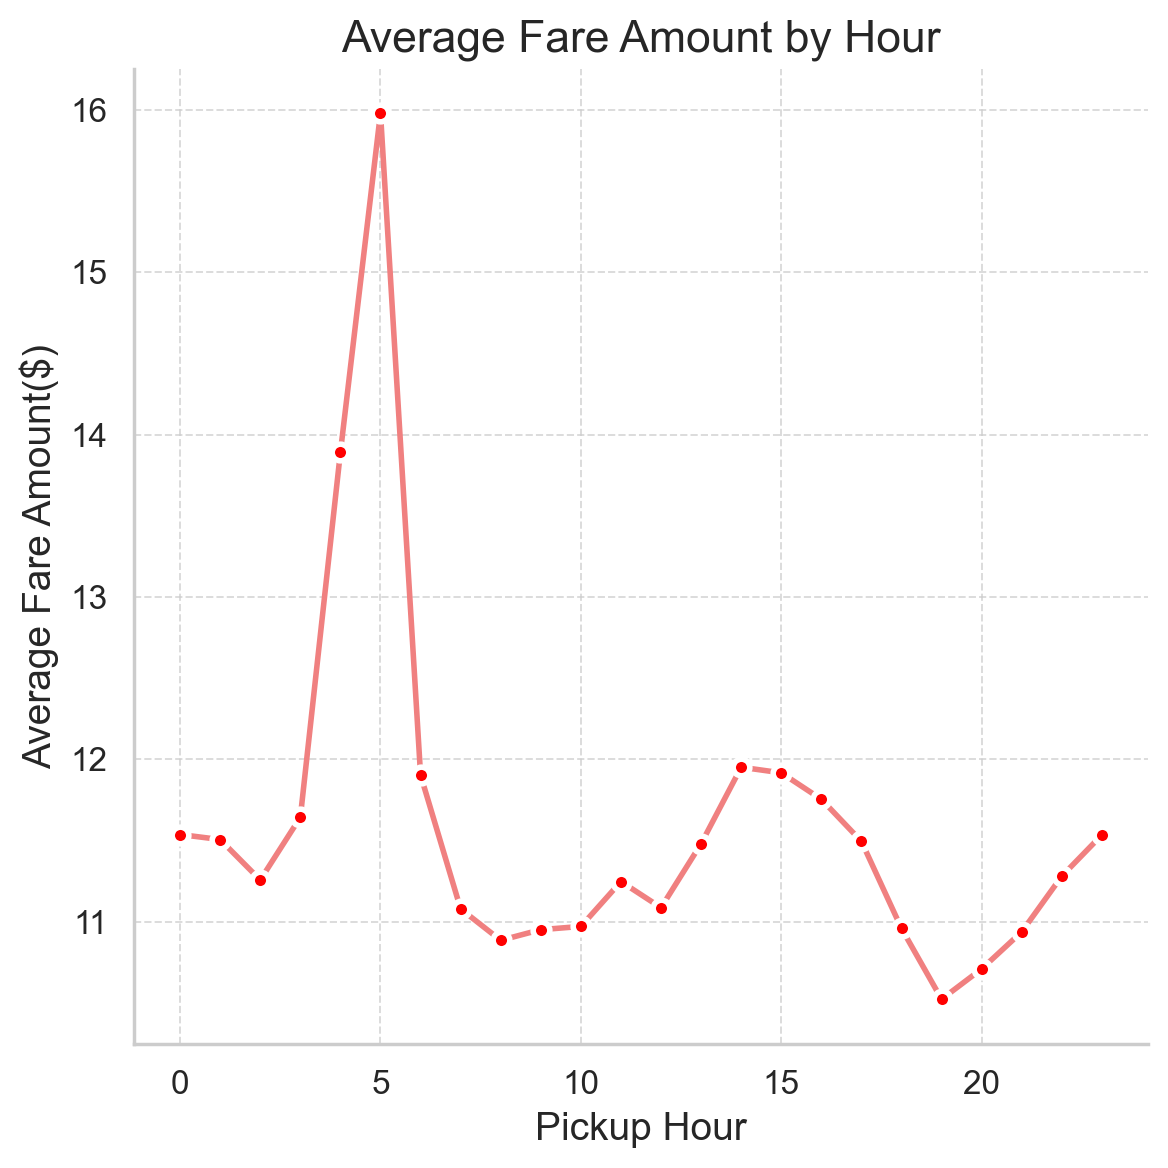

In [13]:
hourly_avg_fare = df.groupby('pickup_hour')['fare_amount'].mean().reset_index()

sns.set(style="whitegrid", palette="Reds")

plt.figure(figsize=(6, 6), dpi=200)

sns.lineplot(x='pickup_hour', y='fare_amount', data=hourly_avg_fare, marker='o', color='lightcoral', linewidth=2, markerfacecolor='red', markeredgewidth=2)

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.xlabel('Pickup Hour', fontsize=14)
plt.ylabel('Average Fare Amount($)', fontsize=14)
plt.title('Average Fare Amount by Hour', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()


In [15]:
df.drop(columns=['pickup_datetime'], inplace=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_year,pickup_month,pickup_weekday,pickup_day,pickup_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,May,Thursday,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,July,Friday,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,August,Monday,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,June,Friday,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,August,Thursday,28,17


## data split and encoding

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Define features and target
X = df.drop(columns=['fare_amount'])  
y = df['fare_amount']                

# Step 2: Shuffle and split 15% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

print(f"Test set size: {X_test.shape[0]}")
print(f"Train and Val set size: {X_train.shape[0]}")

# Step 3: One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train, columns=['pickup_month', 'pickup_weekday', 'pickup_day', 'pickup_year'], drop_first=True)

X_test_encoded = pd.get_dummies(X_test, columns=['pickup_month', 'pickup_weekday', 'pickup_day', 'pickup_year'], drop_first=True)

# Align the columns of the test set to match the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Convert boolean columns to integers (0 and 1) in the encoded sets
X_train_encoded = X_train_encoded.astype(int)
X_test_encoded = X_test_encoded.astype(int)

# Step 5: Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_encoded[['pickup_hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = \
    minmax_scaler.fit_transform(X_train_encoded[['pickup_hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

X_test_encoded[['pickup_hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = \
    minmax_scaler.transform(X_test_encoded[['pickup_hour', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])

# Step 6: Standard Scaling
standard_scaler = StandardScaler()
X_train_encoded[['distance_km', 'passenger_count']] = \
    standard_scaler.fit_transform(X_train_encoded[['distance_km', 'passenger_count']])

X_test_encoded[['distance_km', 'passenger_count']] = \
    standard_scaler.transform(X_test_encoded[['distance_km', 'passenger_count']])

# Step 7: k-fold cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, valid_index) in enumerate(kf.split(X_train_encoded)):

    X_train_fold, X_valid_fold = X_train_encoded.iloc[train_index], X_train_encoded.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

    print(f"Fold {fold + 1}:")
    print(f"  Train set size: {X_train_fold.shape[0]}")
    print(f"  Validation set size: {X_valid_fold.shape[0]}")


Test set size: 28806
Train and Val set size: 163230
Fold 1:
  Train set size: 130584
  Validation set size: 32646
Fold 2:
  Train set size: 130584
  Validation set size: 32646
Fold 3:
  Train set size: 130584
  Validation set size: 32646
Fold 4:
  Train set size: 130584
  Validation set size: 32646
Fold 5:
  Train set size: 130584
  Validation set size: 32646


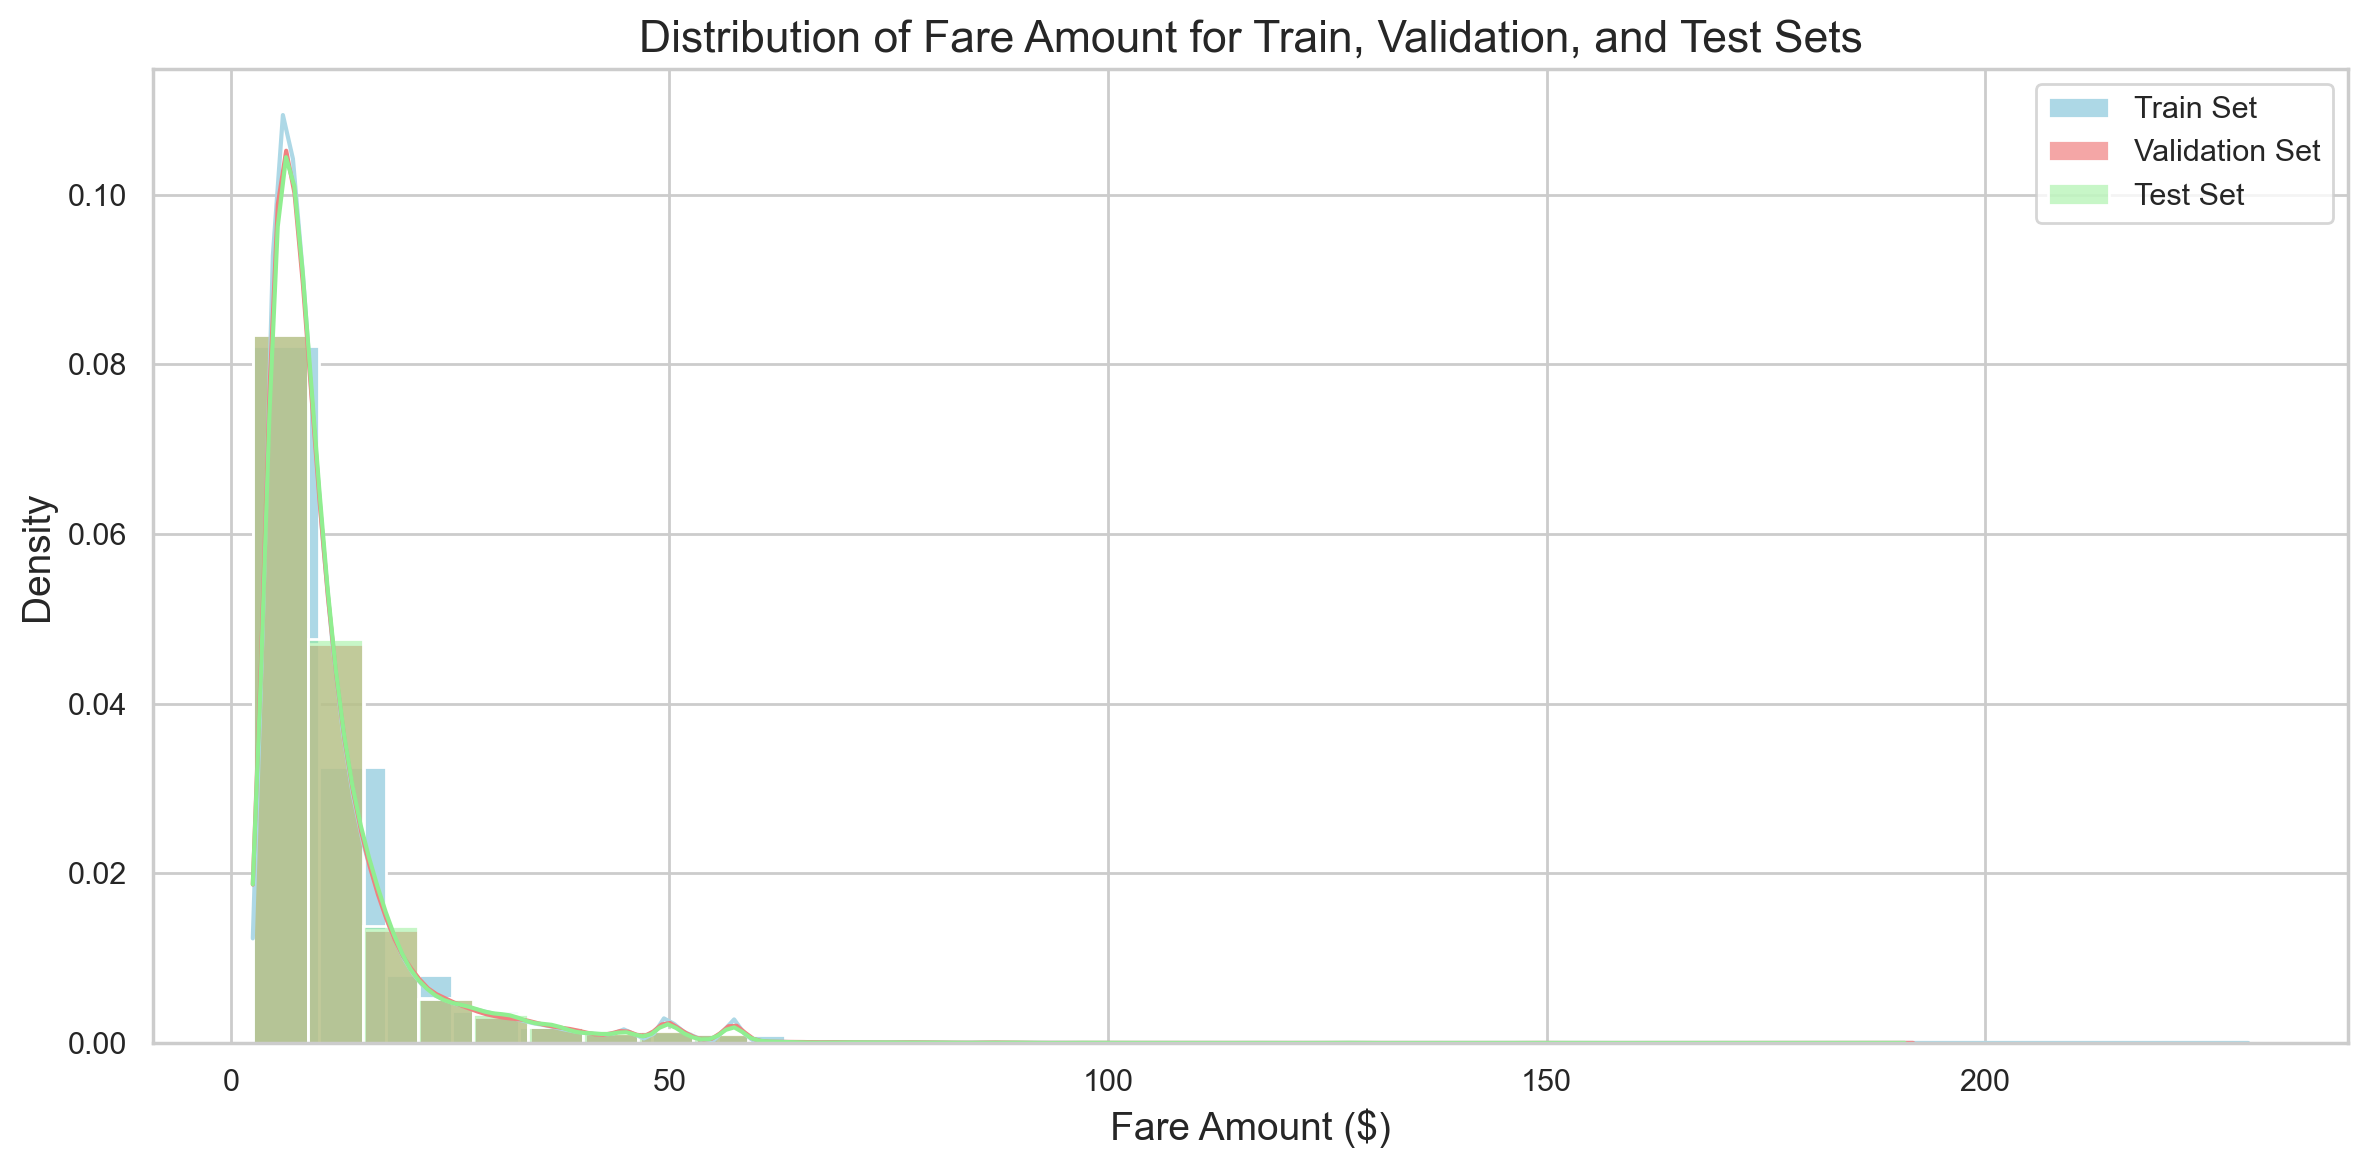

In [46]:
plt.figure(figsize=(12, 6), dpi=200)

sns.histplot(y_train, bins=30, color='lightblue', label='Train Set', kde=True, stat="density", alpha=1)

sns.histplot(y_valid_fold, bins=30, color='lightcoral', label='Validation Set', kde=True, stat="density", alpha=0.7)

sns.histplot(y_test, bins=30, color='lightgreen', label='Test Set', kde=True, stat="density", alpha=0.5)

plt.title('Distribution of Fare Amount for Train, Validation, and Test Sets', fontsize=16)
plt.xlabel('Fare Amount ($)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
X_train_encoded.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,pickup_month_August,pickup_month_December,pickup_month_February,...,pickup_day_28,pickup_day_29,pickup_day_30,pickup_day_31,pickup_year_2010,pickup_year_2011,pickup_year_2012,pickup_year_2013,pickup_year_2014,pickup_year_2015
131812,0.008696,0.982759,0.017391,0.982759,3.297081,3.818392,1.000000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69536,0.017391,0.982759,0.017391,0.982759,-0.527933,0.279413,0.391304,1,0,0,...,0,1,0,0,1,0,0,0,0,0
149382,0.017391,0.982759,0.017391,0.982759,-0.527933,0.279413,0.565217,0,0,0,...,0,0,0,0,0,0,1,0,0,0
65477,0.017391,0.982759,0.017391,0.982759,-0.527933,-0.731724,0.521739,0,0,0,...,0,0,0,0,0,0,0,0,1,0
168145,0.017391,0.982759,0.017391,0.982759,-0.527933,-0.478940,1.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
column_names = X_train_encoded.columns.tolist()
print(column_names)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance_km', 'pickup_hour', 'pickup_month_August', 'pickup_month_December', 'pickup_month_February', 'pickup_month_January', 'pickup_month_July', 'pickup_month_June', 'pickup_month_March', 'pickup_month_May', 'pickup_month_November', 'pickup_month_October', 'pickup_month_September', 'pickup_weekday_Monday', 'pickup_weekday_Saturday', 'pickup_weekday_Sunday', 'pickup_weekday_Thursday', 'pickup_weekday_Tuesday', 'pickup_weekday_Wednesday', 'pickup_day_2', 'pickup_day_3', 'pickup_day_4', 'pickup_day_5', 'pickup_day_6', 'pickup_day_7', 'pickup_day_8', 'pickup_day_9', 'pickup_day_10', 'pickup_day_11', 'pickup_day_12', 'pickup_day_13', 'pickup_day_14', 'pickup_day_15', 'pickup_day_16', 'pickup_day_17', 'pickup_day_18', 'pickup_day_19', 'pickup_day_20', 'pickup_day_21', 'pickup_day_22', 'pickup_day_23', 'pickup_day_24', 'pickup_day_25', 'pickup_day_26', 'pickup_day_27', 'pickup_day_28', 'pick